In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pylab as plt
import networkx as nx

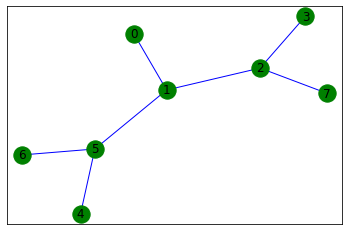

In [3]:
# Initializing points
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

goal = 7
mapping = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()

In [4]:
NO_OF_POINTS = 8

# Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0


R[goal, goal] = 150
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [5]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

# The learning parameter
gamma = 0.8

initial_state = 1


def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


available_act = available_actions(initial_state)

In [6]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action


action = sample_next_action(available_act)


def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [7]:
update(initial_state, action, gamma)


scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

    # Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

max_value 0.0
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score:

    0.           0.          94.96014937]]
max_value 499.3367040000001
Score: 534.160149374479
Trained Q matrix:
[[  0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.          64.           0.           0.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.2          0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.          94.96014937]]
max_value 624.1708800000001
Score: 539.2
Trained Q matrix:
[[  0.    0.    0. 

    0.           0.         100.        ]]
max_value 319.5754905600001
Score: 811.0590040276245
Trained Q matrix:
[[  0.          59.66955101   0.           0.           0.
    0.           0.           0.        ]
 [ 47.73564081   0.          74.58693877   0.           0.
    0.           0.           0.        ]
 [  0.          59.66955101   0.          59.66955101   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.73564081   0.           0.        ]
 [  0.          59.66955101   0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.73564081   0.           0.        ]
 [  0.           0.          74.58693877   0.           0.
    0.           0.         100.        ]]
max_value 319.5754905600001
Score: 858.7946448390965
Trained Q matrix:
[[  0.

Score: 926.8141687953521
Trained Q matrix:
[[  0.          58.78263645   0.           0.           0.
    0.           0.           0.        ]
 [ 47.02610916   0.          73.47829556   0.           0.
   47.02610916   0.           0.        ]
 [  0.          58.78263645   0.          58.78263645   0.
    0.           0.         100.        ]
 [  0.           0.          77.79159215   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   47.02610916   0.           0.        ]
 [  0.          58.78263645   0.           0.          37.62088733
    0.          37.62088733   0.        ]
 [  0.           0.           0.           0.           0.
   47.02610916   0.           0.        ]
 [  0.           0.          77.79159215   0.           0.
    0.           0.          99.27593185]]
max_value 428.46039244800005
Score: 926.8141687953521
Trained Q matrix:
[[  0.          58.78263645   0.           0.           0.
    0.   

Score: 958.6132151666525
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 46.54084723   0.          80.           0.           0.
   46.54084723   0.           0.        ]
 [  0.          63.33958467   0.          63.33958467   0.
    0.           0.         100.        ]
 [  0.           0.          79.17448084   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.67166773   0.           0.        ]
 [  0.          64.           0.           0.          37.23267778
    0.          37.23267778   0.        ]
 [  0.           0.           0.           0.           0.
   46.54084723   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.         100.        ]]
max_value 471.3530887154487
Score: 958.6132151666525
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.    

max_value 594.4659767778872
Score: 973.621838845731
Trained Q matrix:
[[  0.          63.66486756   0.           0.           0.
    0.           0.           0.        ]
 [ 50.93189404   0.          79.58108444   0.           0.
   46.12789661   0.           0.        ]
 [  0.          63.43213669   0.          63.43213669   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.93189404   0.           0.        ]
 [  0.          63.66486756   0.           0.          40.59656748
    0.          40.74551524   0.        ]
 [  0.           0.           0.           0.           0.
   50.93189404   0.           0.        ]
 [  0.           0.          79.58108444   0.           0.
    0.           0.         100.        ]]
max_value 302.77278142230983
Score: 973.621838845731
Trained Q matrix:
[[  0.          63.66486756   0.          

Score: 980.2351137320011
Trained Q matrix:
[[  0.          63.88106324   0.           0.           0.
    0.           0.           0.        ]
 [ 51.10485059   0.          80.           0.           0.
   50.83724288   0.           0.        ]
 [  0.          64.           0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.83724288   0.           0.        ]
 [  0.          63.5465536    0.           0.          40.6697943
    0.          40.6697943    0.        ]
 [  0.           0.           0.           0.           0.
   50.83724288   0.           0.        ]
 [  0.           0.          79.85132905   0.           0.
    0.           0.         100.        ]]
max_value 595.5727814223098
Score: 980.2351137320011
Trained Q matrix:
[[  0.          63.88106324   0.           0.           0.
    0.     

max_value 381.7332640882227
Score: 979.703674486969
Trained Q matrix:
[[  0.          63.65448734   0.           0.           0.
    0.           0.           0.        ]
 [ 50.92358987   0.          80.           0.           0.
   50.92358987   0.           0.        ]
 [  0.          64.           0.          63.65448734   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.92358987   0.           0.        ]
 [  0.          63.65448734   0.           0.          40.7388719
    0.          40.7388719    0.        ]
 [  0.           0.           0.           0.           0.
   50.92358987   0.           0.        ]
 [  0.           0.          79.56810918   0.           0.
    0.           0.         100.        ]]
max_value 599.6957638559453
Score: 979.703674486969
Trained Q matrix:
[[  0.          63.65448734   0.           0

max_value 479.8052888678051
Score: 980.535051128667
Trained Q matrix:
[[  0.          63.98831354   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19065083   0.          79.98539192   0.           0.
   50.91429118   0.           0.        ]
 [  0.          63.98831354   0.          63.99480602   0.
    0.           0.          99.9918844 ]
 [  0.           0.          79.99350752   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.91429118   0.           0.        ]
 [  0.          63.64286397   0.           0.          40.73143294
    0.          40.73143294   0.        ]
 [  0.           0.           0.           0.           0.
   50.91429118   0.           0.        ]
 [  0.           0.          79.55357996   0.           0.
    0.           0.         100.        ]]
max_value 305.38661127057816
Score: 980.535051128667
Trained Q matrix:
[[  0.          63.98831354   0.          

Score: 982.6200212899514
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.18986253   0.          80.           0.           0.
   51.18986253   0.           0.        ]
 [  0.          63.98732816   0.          63.98732816   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.18986253   0.           0.        ]
 [  0.          63.98732816   0.           0.          40.95189002
    0.          40.95189002   0.        ]
 [  0.           0.           0.           0.           0.
   51.18986253   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99480662]]
max_value 599.8753848753953
Score: 982.6200212899514
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.    

    0.           0.          99.99667649]]
max_value 599.9202463202531
Score: 982.6377723308448
Trained Q matrix:
[[  0.          63.99521414   0.           0.           0.
    0.           0.           0.        ]
 [ 51.1860346    0.          79.99401768   0.           0.
   51.19617131   0.           0.        ]
 [  0.          63.99521414   0.          63.99521414   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19617131   0.           0.        ]
 [  0.          63.99521414   0.           0.          40.94882768
    0.          40.94882768   0.        ]
 [  0.           0.           0.           0.           0.
   51.19617131   0.           0.        ]
 [  0.           0.          79.99401768   0.           0.
    0.           0.          99.99667649]]
max_value 749.9003079003163
Score: 982.6410958426047
Trained Q matrix

    0.           0.         100.        ]]
max_value 383.97909305137654
Score: 982.7046579465076
Trained Q matrix:
[[  0.          63.99874554   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19899643   0.          79.99843192   0.           0.
   51.19899643   0.           0.        ]
 [  0.          63.99874554   0.          63.99874554   0.
    0.           0.          99.99912885]
 [  0.           0.          79.99843192   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19899643   0.           0.        ]
 [  0.          63.99874554   0.           0.          40.95919715
    0.          40.95919715   0.        ]
 [  0.           0.           0.           0.           0.
   51.19899643   0.           0.        ]
 [  0.           0.          79.99930308   0.           0.
    0.           0.         100.        ]]
max_value 479.97386631422063
Score: 982.7046579465076
Trained Q matr

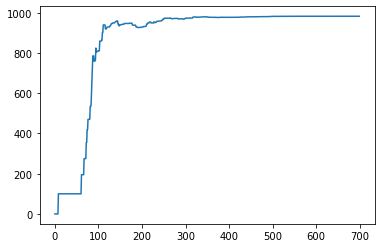

In [8]:
plt.plot(scores)
plt.show()